## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) ) 


In [58]:
# link necessary 
library(tidyverse)
library(corrplot)

# settings for plot visualisation
options(repr.plot.height = 5, repr.plot.res = 200)


The downloaded binary packages are in
	/var/folders/nt/6ljdmgqs65j36qg5pd5z9vxm0000gn/T//RtmpA2BIbu/downloaded_packages

The downloaded binary packages are in
	/var/folders/nt/6ljdmgqs65j36qg5pd5z9vxm0000gn/T//RtmpA2BIbu/downloaded_packages

The downloaded binary packages are in
	/var/folders/nt/6ljdmgqs65j36qg5pd5z9vxm0000gn/T//RtmpA2BIbu/downloaded_packages

The downloaded binary packages are in
	/var/folders/nt/6ljdmgqs65j36qg5pd5z9vxm0000gn/T//RtmpA2BIbu/downloaded_packages


corrplot 0.92 loaded



Načítanie datasetu - dataset viete funkciami dostupnými v R stiahnuť a rozbaliť aj z formátu ZIP

In [4]:
# URL of the dataset
dataset_url <- "https://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip"

# create temporary destination file path with .zip extension
dest_file <- tempfile(fileext = ".zip")

# download the dataset, mode = write binary
download.file(dataset_url, destfile = dest_file, mode = "wb")

# unzip the file into chosen location (enter directory)
unzip(dest_file, exdir = "./t3_cv2/datadir") # TODO fill in

### Úloha 1 (1b)

Načítajte dataset do premennej `data_hw`.

In [24]:
# TODO
data_hw <- read.csv("./heart_failure_clinical_records_dataset.csv")

summary(data_hw)

class(data_hw$age) 
class(data_hw$anaemia)
class(data_hw$high_blood_pressure) 
class(data_hw$serum_sodium)
class(data_hw$DEATH_EVENT)

sum(duplicated(data_hw))

      age           anaemia       creatinine_phosphokinase    diabetes     
 Min.   :40.00   Min.   :0.0000   Min.   :  23.0           Min.   :0.0000  
 1st Qu.:51.00   1st Qu.:0.0000   1st Qu.: 116.5           1st Qu.:0.0000  
 Median :60.00   Median :0.0000   Median : 250.0           Median :0.0000  
 Mean   :60.83   Mean   :0.4314   Mean   : 581.8           Mean   :0.4181  
 3rd Qu.:70.00   3rd Qu.:1.0000   3rd Qu.: 582.0           3rd Qu.:1.0000  
 Max.   :95.00   Max.   :1.0000   Max.   :7861.0           Max.   :1.0000  
 ejection_fraction high_blood_pressure   platelets      serum_creatinine
 Min.   :14.00     Min.   :0.0000      Min.   : 25100   Min.   :0.500   
 1st Qu.:30.00     1st Qu.:0.0000      1st Qu.:212500   1st Qu.:0.900   
 Median :38.00     Median :0.0000      Median :262000   Median :1.100   
 Mean   :38.08     Mean   :0.3512      Mean   :263358   Mean   :1.394   
 3rd Qu.:45.00     3rd Qu.:1.0000      3rd Qu.:303500   3rd Qu.:1.400   
 Max.   :80.00     Max.   :1.0

[1] "numeric"

[1] "integer"

[1] "integer"

[1] "integer"

[1] "integer"

[1] 0

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

**Obsahuje dataset duplicitné záznamy?**

### Úloha 2 (1b)

Skúmajte premennú 'sex' (pohlavie). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž) 

In [31]:
# TODO
sum(data_hw$sex == 1)
sum(data_hw$sex == 0)

sum(data_hw$sex == 1 & data_hw$smoking == 0)
sum(data_hw$sex == 0 & data_hw$smoking == 0)

[1] 194

[1] 105

[1] 102

[1] 101

**Koľko záznamov mužov a žien obsahuje dataset?**

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

### Úloha 3 (1b)

Popíšte premennú 'age' (vek).

In [36]:
# TODO
summary(data_hw$age)

new_table <- sort(table(data_hw$age), decreasing = TRUE)
new_table

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   51.00   60.00   60.83   70.00   95.00 


    60     50     65     70     45     55     75     53     58     63     40 
    33     27     26     25     19     17     11     10     10      8      7 
    42     72     80     85     52     62     68     49     51     59     61 
     7      7      7      6      5      5      5      4      4      4      4 
    73     46     64     69     82     90     44     48     54     57 60.667 
     4      3      3      3      3      3      2      2      2      2      2 
    66     67     77     78     95     41     43     47     56     79     81 
     2      2      2      2      2      1      1      1      1      1      1 
    86     87     94 
     1      1      1 

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

**Z akého veku je v datasete najviac záznamov?**

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

- pre vytvorenie premennej použite funkciu ifelse - https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/ifelse

In [38]:
# TODO
#data_hw$risk <- ifelse(data_hw$age > 50 & data_hw$serum_creatinine > 1.2, 'High', 'Low')

data_hw


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,risk
<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
75,0,582,0,20,1,265000,1.90,130,1,0,4,1,High
55,0,7861,0,38,0,263358,1.10,136,1,0,6,1,Low
65,0,146,0,20,0,162000,1.30,129,1,1,7,1,High
50,1,111,0,20,0,210000,1.90,137,1,0,7,1,Low
65,1,160,1,20,0,327000,2.70,116,0,0,8,1,High
90,1,47,0,40,1,204000,2.10,132,1,1,8,1,High
75,1,246,0,15,0,127000,1.20,137,1,0,10,1,Low
60,1,315,1,60,0,454000,1.10,131,1,1,10,1,Low
65,0,157,0,65,0,263358,1.50,138,0,0,10,1,High


Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

- počet stĺpcov (atribút 'breaks') môže mať predvolenú hodnotu, nemusíte ho špecifikovať

- funkcia hist - https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/hist

(hint: použite funkciu filter na záznamy, kde 'risk' == 'High', a v histograme ako dáta vložte hodnoty z premennej 'age')

Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Počet príppaov' in 'mbcsToSbcs': dot substituted for <c4>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Počet príppaov' in 'mbcsToSbcs': dot substituted for <8d>”


$breaks
 [1] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[26] 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95

$counts
 [1]  2  3  2  3  1  0  2  1 18  2  0  2  2 11  0  0  1  1  7  0  4  2  0  6  0
[26]  1  1  1  5  0  1  0  0  3  1  0  0  0  1  0  0  0  1  1

$density
 [1] 0.02325581 0.03488372 0.02325581 0.03488372 0.01162791 0.00000000
 [7] 0.02325581 0.01162791 0.20930233 0.02325581 0.00000000 0.02325581
[13] 0.02325581 0.12790698 0.00000000 0.00000000 0.01162791 0.01162791
[19] 0.08139535 0.00000000 0.04651163 0.02325581 0.00000000 0.06976744
[25] 0.00000000 0.01162791 0.01162791 0.01162791 0.05813953 0.00000000
[31] 0.01162791 0.00000000 0.00000000 0.03488372 0.01162791 0.00000000
[37] 0.00000000 0.00000000 0.01162791 0.00000000 0.00000000 0.00000000
[43] 0.01162791 0.01162791

$mids
 [1] 51.5 52.5 53.5 54.5 55.5 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5
[16] 66.5 67.5 68.5 69.5 70.5 71.5 72.5 73.5 74.5 75.5 76.5 77.5 78.5 79.5 

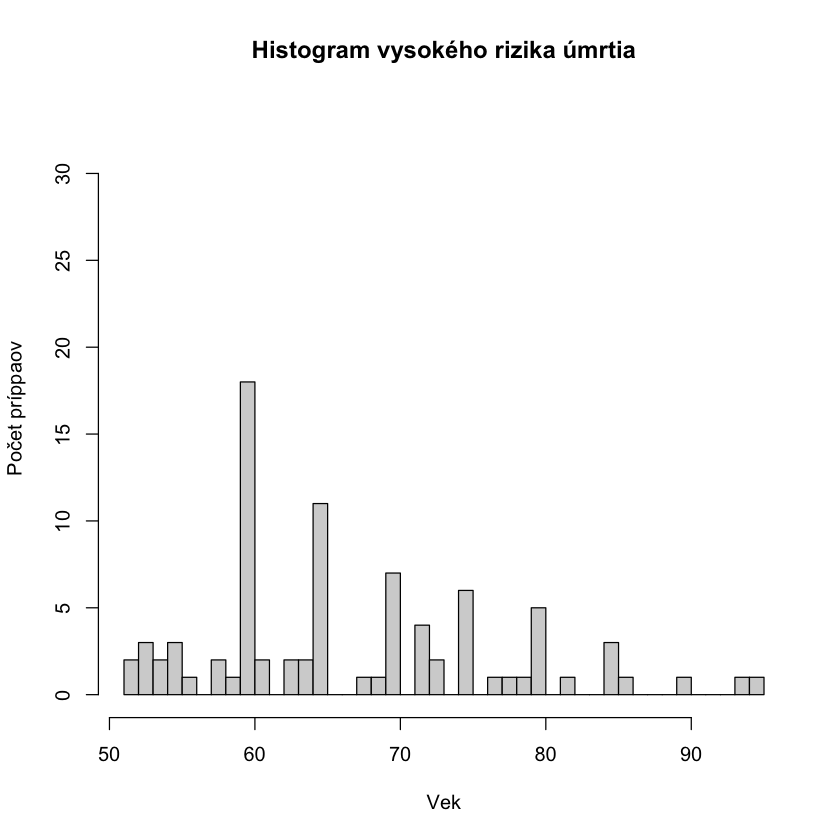

In [50]:
# TODO
histogram <- data_hw %>%
  filter(risk == 'High') %>%
  .$age %>%
  hist(breaks = length(unique(data_hw$age)), 
       xlab = "Vek", 
       ylab = "Počet príppaov", 
       main = "Histogram vysokého rizika úmrtia", 
       ylim = c(0, max(table(data_hw$age))), 
       labels = unique(data_hw$age))
       # xlim = c(min(data_hw$age), max(data_hw$age)))

print(histogram)





**V akom veku je riziko zlyhania srdca najväčšie?**

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

- korelácia sa dá analyzovať iba na numerických premenných, preto musíte dátový typ premennej zmeniť na kategorický a ten uložiť vo formáte 'integer' alebo 'numeric'.


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,risk
age,1.00000000,0.082414418,-0.09214429,-0.091774309,0.06640272,0.09991765,-0.051994206,0.214623342,-0.04277371,0.058502932,0.02589671,-0.216475456,0.235687137,-0.34446621
anaemia,0.08241442,1.000000000,-0.21567551,-0.012729046,0.03283223,0.03818200,-0.032912247,0.007456078,0.04673471,-0.094768961,-0.10728984,-0.136212142,0.066270098,-0.02828946
creatinine_phosphokinase,-0.09214429,-0.215675507,1.00000000,0.044854790,-0.07916026,-0.07814407,0.043162931,-0.075010104,0.00725620,0.016168055,-0.03287555,0.116485156,0.034264827,0.07416184
diabetes,-0.09177431,-0.012729046,0.04485479,1.000000000,-0.01473305,-0.01273238,0.076235559,-0.029317322,-0.07880763,-0.157729504,-0.14717341,0.027893807,-0.001942883,0.02925797
ejection_fraction,0.06640272,0.032832234,-0.07916026,-0.014733045,1.00000000,0.02749644,0.062032566,-0.101780281,0.17770180,-0.147153494,-0.06998112,0.051734833,-0.263677960,0.09434580
high_blood_pressure,0.09991765,0.038182003,-0.07814407,-0.012732382,0.02749644,1.00000000,0.066993383,-0.051778520,0.02868100,-0.104614629,-0.05571137,-0.195215386,0.079351058,0.04954244
platelets,-0.05199421,-0.032912247,0.04316293,0.076235559,0.06203257,0.06699338,1.000000000,-0.059464415,0.04459169,-0.134705193,0.00571690,-0.006927171,-0.044094803,-0.01101044
serum_creatinine,0.21462334,0.007456078,-0.07501010,-0.029317322,-0.10178028,-0.05177852,-0.059464415,1.000000000,-0.27032855,0.024791670,-0.04138947,-0.189981950,0.356706152,-0.70673214
serum_sodium,-0.04277371,0.046734709,0.00725620,-0.078807628,0.17770180,0.02868100,0.044591695,-0.270328550,1.00000000,-0.033723508,0.01055784,0.096882155,-0.200811541,0.21464803
sex,0.05850293,-0.094768961,0.01616806,-0.157729504,-0.14715349,-0.10461463,-0.134705193,0.024791670,-0.03372351,1.000000000,0.44589171,-0.015522485,-0.004316376,-0.03406366


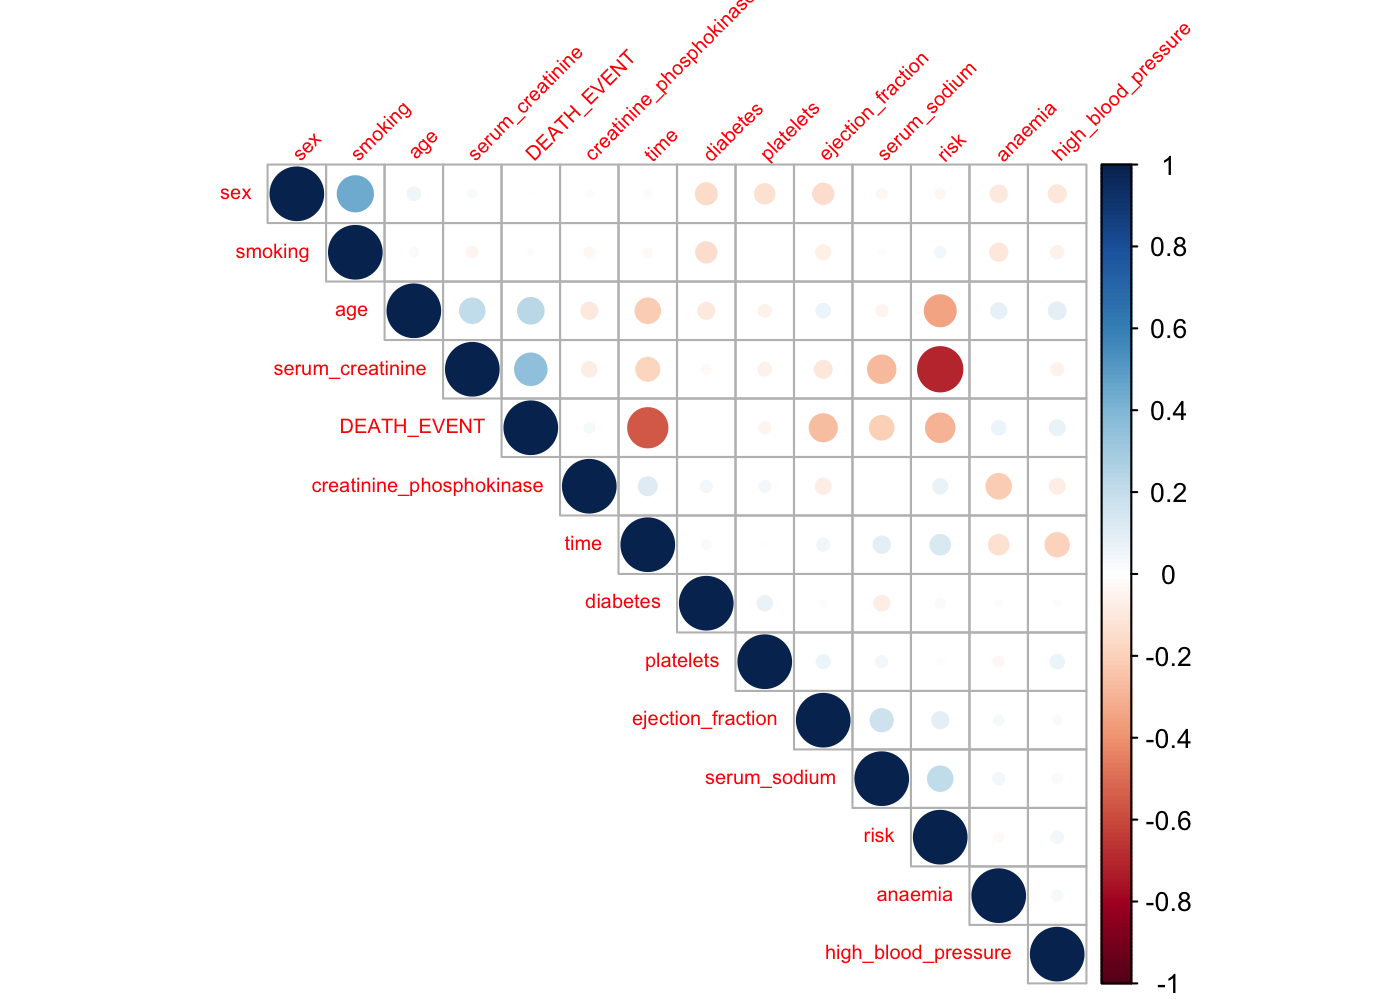

In [59]:
# TODO
# data_hw$age <- as.factor(data_hw$age)
# data_hw$age <- as.integer(data_hw$age)

# data_hw$anaemia <- as.factor(data_hw$anaemia)
# data_hw$anaemia <- as.integer(data_hw$anaemia)

# data_hw$creatinine_phosphokinase <- as.factor(data_hw$creatinine_phosphokinase)
# data_hw$creatinine_phosphokinase <- as.integer(data_hw$creatinine_phosphokinase)
#bol som lenivy...

columns_to_convert <- c("age", "anaemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "sex", "smoking", "time", "DEATH_EVENT", "risk")
data_hw[columns_to_convert] <- lapply(data_hw[columns_to_convert], function(x) as.integer(as.factor(x)))


data_matrix = cor(data_hw)
data_matrix
corrplot(data_matrix, order="hclust", type='upper',tl.srt = 45, tl.cex = 0.6)
                                      

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure